In [1]:
from regressors import *
import pickle
import pandas as pd

In [2]:
ensembleregression = EnsembleRegression(n_regressors=5,n_variables=3, eps=3, decision_boundary=0.6, global_search=False)
spatialcomparision = SpatialComparision()
smoothpredictor = SmoothingAndPredict()
ransacregressor = RansacRegressor()
huberregressor = HuberRegressor()
theilSenregressor = TheilSenRegressor()


In [121]:

n_stations = 450
n_timesteps= 100 #maybe 144 is the maximum to propoerly manage them 
k = 10
p_noise_stations = 0.15
p_noise_timesteps= 0.15
print("# of noises:", n_stations * n_timesteps * p_noise_stations * p_noise_timesteps)
print("# of data :", n_stations * n_timesteps )

data = Tempearture_DWD(n_stations, n_timesteps, k, p_noise_stations=p_noise_stations, p_noise_timesteps= p_noise_timesteps)


# of noises: 1012.5
# of data : 45000


def evaluator(regressor) : 
    RESULT = []    
    lst_n_timesteps = range(50,150,10)
    
    for n_timesteps in lst_n_timesteps : 
        n_stations = 450
    #     n_timesteps= 50 #maybe 144 is the maximum to propoerly manage them     
        k = 10
        p_noise_stations = 0.05
        p_noise_timesteps= 0.05    
        data = Tempearture_DWD(n_stations, n_timesteps, k, p_noise_stations=p_noise_stations, p_noise_timesteps= p_noise_timesteps)
        
        executor = Executor(data, regressor)
        try : 
            resultTotal = executor.evaluate_validator()  
            result = [resultTotal['precision'],resultTotal['recall'], resultTotal['f1']]
            print(result)
        except : 
            result = [-1,-1,-1]


        RESULT.append(result)
    return np.array(RESULT)

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [122]:
executorHuber = Executor(data, huberregressor)
result = executorHuber.evaluate_validator()
[result['precision'],result['recall'], result['f1']]


[0.981, 0.986, 0.983]

In [123]:
executorSmooth = Executor(data, smoothpredictor)
result = executorSmooth.evaluate_validator()
[result['precision'],result['recall'], result['f1']]


[0.996, 0.975, 0.985]

In [124]:
executorOld = Executor(data, spatialcomparision)
result = executorOld.evaluate_validator()
[result['precision'],result['recall'], result['f1']]


[0.732, 0.788, 0.759]

In [15]:
executor = Executor(data, theilSenregressor)
result = executor.evaluate_validator()
[result['precision'],result['recall'], result['f1']]


[0.8, 0.962, 0.874]

In [106]:
executor = Executor(data, ransacregressor)
result = executor.evaluate_validator()
[result['precision'],result['recall'], result['f1']]


[0.677, 0.991, 0.804]

In [18]:
executor = Executor(data, spatialcomparision)
result = executor.evaluate_validator()
[result['precision'],result['recall'], result['f1']]


[0.855, 0.732, 0.789]

In [17]:
executor = Executor(data, smoothpredictor)
result = executor.evaluate_validator()
[result['precision'],result['recall'], result['f1']]


[0.995, 0.973, 0.984]

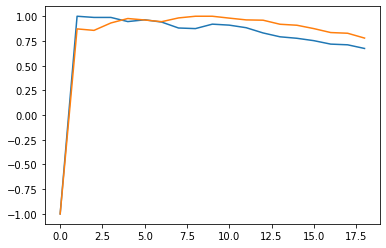

In [25]:
plt.plot(RESULT[:,0])
plt.plot(RESULT2[:,0])

In [ ]:
executor = Executor(data, smoothpredictor)
result = executor.evaluate_validator()
[result['precision'],result['recall'], result['f1']]

In [26]:
%%timeit
RESULT = evaluator(huberregressor)

[1.0, 1.0, 1.0]
[1.0, 0.977, 0.988]
[1.0, 0.932, 0.965]
[0.957, 1.0, 0.978]
[0.877, 0.97, 0.921]
[0.837, 0.989, 0.907]
[0.843, 0.977, 0.905]
[0.777, 0.989, 0.87]
[0.843, 0.973, 0.903]
[0.796, 0.977, 0.877]
[0.795, 1.0, 0.886]
[0.74, 0.992, 0.848]
[0.722, 0.994, 0.836]
[0.646, 0.983, 0.78]
[0.597, 0.994, 0.746]
[0.558, 0.977, 0.71]
[0.541, 0.99, 0.7]
[0.506, 0.982, 0.668]
[1.0, 1.0, 1.0]
[1.0, 1.0, 1.0]
[1.0, 1.0, 1.0]
[0.957, 1.0, 0.978]
[0.925, 0.939, 0.932]
[0.906, 0.989, 0.946]
[0.825, 0.966, 0.89]
[0.773, 0.966, 0.859]
[0.887, 1.0, 0.94]
[0.8, 1.0, 0.889]
[0.765, 0.962, 0.852]
[0.703, 0.985, 0.82]
[0.702, 0.981, 0.818]
[0.611, 0.989, 0.755]
[0.592, 0.983, 0.739]
[0.564, 1.0, 0.721]
[0.55, 1.0, 0.71]
[0.495, 0.991, 0.66]
[1.0, 0.909, 0.952]
[0.913, 0.955, 0.934]
[0.977, 0.977, 0.977]
[0.978, 1.0, 0.989]
[0.887, 0.955, 0.92]
[0.87, 0.989, 0.926]
[0.838, 1.0, 0.912]
[0.81, 0.966, 0.881]
[0.887, 1.0, 0.94]
[0.788, 0.985, 0.876]
[0.802, 0.985, 0.884]
[0.701, 0.992, 0.821]
[0.668, 0.994,

In [27]:
%%timeit
RESULT2 = evaluator(smoothpredictor)

[0.773, 0.773, 0.773]
[0.867, 0.886, 0.876]
[0.955, 0.955, 0.955]
[0.977, 0.977, 0.977]
[0.985, 0.97, 0.977]
[0.967, 0.989, 0.978]
[0.955, 0.966, 0.96]
[0.954, 0.943, 0.948]
[1.0, 0.973, 0.986]
[0.962, 0.97, 0.966]
[0.977, 0.985, 0.981]
[0.922, 0.985, 0.952]
[0.879, 0.987, 0.93]
[0.831, 0.977, 0.898]
[0.763, 0.989, 0.861]
[0.729, 0.977, 0.835]
[0.693, 0.99, 0.815]
[0.648, 0.973, 0.778]
[0.722, 0.591, 0.65]
[0.857, 0.955, 0.903]
[0.955, 0.955, 0.955]
[0.911, 0.932, 0.921]
[0.953, 0.924, 0.938]
[0.977, 0.977, 0.977]
[0.989, 0.989, 0.989]
[0.977, 0.977, 0.977]
[1.0, 0.982, 0.991]
[0.97, 0.977, 0.973]
[0.969, 0.962, 0.965]
[0.91, 0.992, 0.949]
[0.843, 0.974, 0.904]
[0.832, 0.983, 0.901]
[0.794, 0.983, 0.878]
[0.746, 0.983, 0.848]
[0.701, 0.995, 0.823]
[0.654, 0.995, 0.789]
[0.818, 0.818, 0.818]
[0.804, 0.841, 0.822]
[0.927, 0.864, 0.894]
[0.953, 0.932, 0.942]
[1.0, 0.955, 0.977]
[0.945, 0.977, 0.961]
[0.989, 0.989, 0.989]
[0.956, 0.989, 0.972]
[0.991, 0.982, 0.986]
[1.0, 0.962, 0.981]
[0.9

In [ ]:

regressor = SmoothingAndPredict()
executor = Executor(data, regressor)
executor.evaluate_validator()

In [ ]:
data.dic_timesteps

In [ ]:
executor.validate(3)

In [ ]:
smoothRESULT = evaluator(smoothpredictor)

In [ ]:
ransacRESULT = evaluator(ransacregressor)

In [ ]:
plt.figure(figsize=(20,3))
plt.plot(smoothRESULT[:,0])
plt.plot(ransacRESULT[:,0])

In [ ]:
noises = data.matrix_noises.flatten()
plt.figure(figsize=(10,3))
plt.hist(noises[(noises >0) | (noises<0)], bins=100)

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(data.matrix_noises)
plt.colorbar()

In [ ]:
plt.figure(figsize=(20,7))
plt.bar(np.array(lst_n_timesteps),  RESULT_2[:,1], width=3)
plt.bar(np.array(lst_n_timesteps) + 1, RESULT[:,1], width=3)
# plt.bar(np.array(lst_n_timesteps) + 2, RESULT_1[:,0], width=1)
# plt.bar(np.array(lst_n_timesteps) + 3, RESULT_OLD[:,0], width=1)
plt.legend(['ransac', 'smoothing','random','original'])

In [ ]:
validatorNew2 = Executor(data, smoothpredictor)


In [ ]:
resultNew = validatorNew.evaluate_validator()  
resultNew['precision'],resultNew['recall'], resultNew['f1']

In [ ]:
resultNew2 = validatorNew2.evaluate_validator()  
resultNew2['precision'],resultNew2['recall'], resultNew2['f1']

In [ ]:
RESULT_1 = []
lst_n_timesteps = range(10,400,10)

for n_timesteps in lst_n_timesteps : 
    if n_timesteps % 100 == 0 : print(n_timesteps)
    n_stations = 450
#     n_timesteps= 50 #maybe 144 is the maximum to propoerly manage them     
    k = 10
    p_noise_stations = 0.10
    p_noise_timesteps= 0.10    
    
    data = Tempearture_DWD(n_stations, n_timesteps, k, p_noise_stations=p_noise_stations, p_noise_timesteps= p_noise_timesteps)    
    validatorNew= Executor(data, ensembleregression)
    try : 
        resultNew = validatorNew.evaluate_validator()  
        result = resultNew['precision'],resultNew['recall'], resultNew['f1']
    except Exception as e : 
        print(e)
        result = [-1,-1,-1]
        
    
    RESULT_1.append(result)
RESULT_1 = np.array(RESULT_1)

In [ ]:
RESULT_OLD

In [ ]:
RESULT_OLD = []
lst_n_timesteps = range(10,400,10)

for n_timesteps in lst_n_timesteps : 
    if n_timesteps % 100 == 0 : print(n_timesteps)
    n_stations = 450
#     n_timesteps= 50 #maybe 144 is the maximum to propoerly manage them     
    k = 10
    p_noise_stations = 0.10
    p_noise_timesteps= 0.10    
    
    data = Tempearture_DWD(n_stations, n_timesteps, k, p_noise_stations=p_noise_stations, p_noise_timesteps= p_noise_timesteps)    
    validatorOld = Executor(data, spatialcomparision)
    try : 
        resultOld = validatorOld.evaluate_validator()  
        result = [resultOld['precision'],resultOld['recall'], resultOld['f1']]
    except Exception as e : 
        print(e)
        result = [-1,-1,-1]
        
    
    RESULT_OLD.append(result)
RESULT_OLD = np.array(RESULT_OLD)

In [ ]:
plt.figure(figsize=(20,7))
plt.bar(np.array(lst_n_timesteps)[:12],  RESULT[:12,1], width=2)
plt.bar(np.array(lst_n_timesteps)[:12] + 2, RESULT_1[:12,1], width=2)
plt.bar(np.array(lst_n_timesteps)[:12] + 4, RESULT_OLD[:12,1], width=2)
plt.legend(['smoothing','random','original'])

In [ ]:
plt.figure(figsize=(20,7))
plt.bar(np.array(lst_n_timesteps)[:12],  RESULT[:12,0], width=2)
plt.bar(np.array(lst_n_timesteps)[:12] + 2, RESULT_1[:12,0], width=2)
plt.bar(np.array(lst_n_timesteps)[:12] + 4, RESULT_OLD[:12,0], width=2)
plt.legend(['smoothing','random','original'])

In [ ]:
plt.figure(figsize=(20,7))
plt.bar(np.array(lst_n_timesteps),  RESULT[:,1], width=2)
plt.bar(np.array(lst_n_timesteps) + 2, RESULT_1[:,1], width=2)
plt.bar(np.array(lst_n_timesteps) + 4, RESULT_OLD[:,1], width=2)
plt.legend(['smoothing','random','original'])

In [ ]:
resultOld = validatorOld.evaluate_validator()  
resultOld['precision'],resultOld['recall'], resultOld['f1']

In [68]:
executorSmooth = Executor(data, smoothpredictor)
executorOld = Executor(data, spatialcomparision)


selected station 35
neighbor stations with noise:  [364]
answer:          []
predicted by new [] 0
predicted by old [86] 1


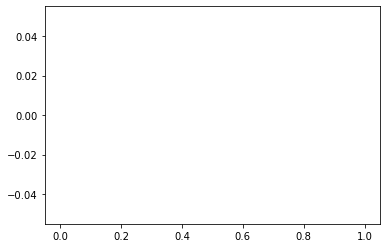

In [63]:
#Test for False Positive
ts_data = data.ts_data
neighbor = data._neighbor

while True : 
    station = np.random.choice(range(len(ts_data)))

    try : 
        answer = sorted(data.dic_timesteps[station])
    except :
        answer = []

    pred_by_new = [int(s.split('_')[1]) for s in executorSmooth.validate(station)]    
    pred_by_old = [int(s.split('_')[1]) for s in executorOld.validate(station)]
    
    if (len(pred_by_old) >0) and (len(answer) == 0 ) : 

        print("selected station", station)
        print("neighbor stations with noise: ", [s for s in data._neighbor[station] if s in data._picked_stations])
        print("answer:         ",answer)
        print("predicted by new",pred_by_new, levenshteinDistance(answer, pred_by_new ))
        print("predicted by old",pred_by_old, levenshteinDistance(answer, pred_by_old ))
        plt.hist(data.matrix_noises[station][abs(data.matrix_noises[station]) >0] )
        break


selected station 252
neighbor stations with noise:  [106, 407, 75]
answer:          [2, 30, 36, 41, 52, 72, 77, 81, 82, 84, 90, 93, 94, 95, 96]
predicted by new [2, 30, 36, 41, 52, 72, 77, 81, 82, 84, 90, 93, 94, 95, 96] 0
predicted by old [2, 30, 52, 77, 81, 82, 84, 90, 94, 95, 96] 4


(array([3., 0., 0., 0., 1., 0., 0., 1., 0., 2., 0., 0., 0., 0., 1., 1., 0.,
        1., 2., 3.]),
 array([-28.48448678, -25.98311354, -23.48174031, -20.98036707,
        -18.47899383, -15.97762059, -13.47624736, -10.97487412,
         -8.47350088,  -5.97212764,  -3.47075441,  -0.96938117,
          1.53199207,   4.03336531,   6.53473854,   9.03611178,
         11.53748502,  14.03885826,  16.54023149,  19.04160473,
         21.54297797]),
 <BarContainer object of 20 artists>)

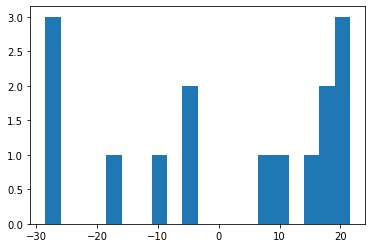

In [132]:
#Test for Positive
ts_data = data.ts_data
neighbor = data._neighbor

# station = np.random.choice(range(len(ts_data)))
station = np.random.choice(data._picked_stations)
try : 
    answer = sorted(data.dic_timesteps[station])
except :
    answer = []

pred_by_new = [int(s.split('_')[1]) for s in executorSmooth.validate(station)]
pred_by_old = [int(s.split('_')[1]) for s in executorOld.validate(station)]

print("selected station", station)
print("neighbor stations with noise: ", [s for s in data._neighbor[station] if s in data._picked_stations])
print("answer:         ",answer)
print("predicted by new",pred_by_new, levenshteinDistance(answer, pred_by_new ))
print("predicted by old",pred_by_old, levenshteinDistance(answer, pred_by_old ))
plt.hist(data.matrix_noises[station][abs(data.matrix_noises[station]) >0], bins=20 )

29.684486781707918


<BarContainer object of 100 artists>

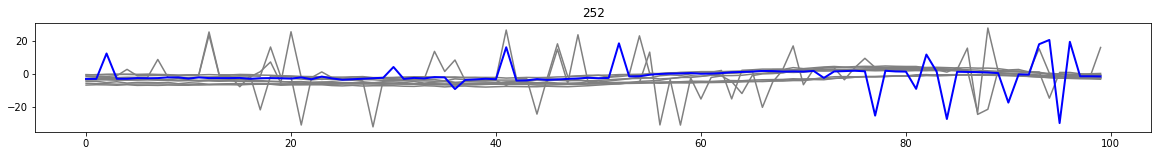

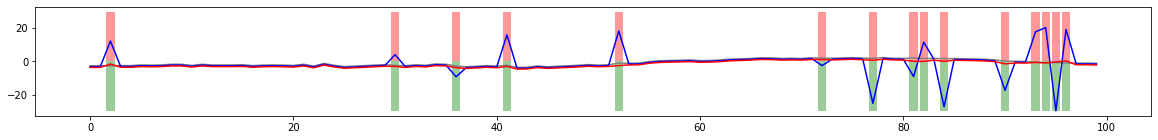

In [133]:
value_plot = max(abs(ts_data[station]))
plt.figure(figsize=(20,2))
plt.plot(ts_data[neighbor[station]].T, color='grey')
plt.plot(ts_data[station], color='blue', linewidth=2)
# plt.plot(data._ts_rawdata[station], color='orange')
plt.title(station)

plt.figure(figsize=(20,2))
plt.plot(data._ts_rawdata[station] + 0.5, color='grey')
plt.plot(ts_data[station], color='blue')
plt.plot(smoothpredictor.correct(ts_data[neighbor[station]], ts_data[station]) -0.5, color='red')



print(value_plot)
bar1 = np.zeros(len(ts_data[station]))
bar2 = np.zeros(len(ts_data[station]))
bar1[answer] = value_plot
bar2[pred_by_new] = value_plot
plt.bar(np.arange(len(bar1)), bar1, color='red', alpha=0.4)
plt.bar(np.arange(len(bar1)), -bar2, color='green', alpha=0.4)
# plt.legend(['data_w_noise','original','predict'])